In [4]:
import matplotlib.pyplot as plt
import scipy
import lmdb
import ase
import pickle
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
## get mappings of sid (a random number) to systems (adslabs) that are in the OC20 dataset 
with open("oc20_data_mapping.pkl", "rb") as input_file:
    mappings = pickle.load(input_file)

In [3]:
df_val_id = pd.read_csv("val_sets_with_anomalies/val_id_30k_anomalies.csv", index_col=0)

In [5]:
for df in [df_val_id]:
    material_classes = []
    surfaces = []
    adsorbates = []
    for i in tqdm(df["sid"].values):
        material_classes.append(mappings[i]["class"])
        surfaces.append(mappings[i]["bulk_symbols"])
        adsorbates.append(mappings[i]["ads_symbols"])
    material_classes = np.array(material_classes)
    # add system information to the dataframe
    df["cat_class"] = material_classes
    df["bulk_symbols"] = surfaces
    df["ads_symbols"] = adsorbates

100%|██████████| 30000/30000 [00:00<00:00, 443589.78it/s]


In [6]:
original_dict = {}
no_surface_anomaly_dict = {}
no_anomaly_dict = {}
for material in [0,1,2,3]:
    original_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}")["val_id_goc"] \
                                             -df_val_id.query(f"cat_class=={material}")["ref_energies"]))
    no_surface_anomaly_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}&surface_anomalies!=1")["val_id_goc"] \
        -df_val_id.query(f"cat_class=={material}&surface_anomalies!=1")["ref_energies"]))
    no_anomaly_dict[material] = np.mean(np.abs(df_val_id.query(f"cat_class=={material}&surface_anomalies!=1&adsorbate_dissociated_anomalies!=1&adsorbate_desorbed_anomalies!=1")["val_id_goc"] \
        -df_val_id.query(f"cat_class=={material}&surface_anomalies!=1&adsorbate_dissociated_anomalies!=1&adsorbate_desorbed_anomalies!=1")["ref_energies"]))

In [7]:
np.mean(np.abs(df_val_id["val_id_goc"] -df_val_id["ref_energies"]))

0.16584703332046644

In [8]:
np.mean(np.abs(df_val_id.query("surface_anomalies!=1")["val_id_goc"] -df_val_id.query("surface_anomalies!=1")["ref_energies"]))

0.09996626171536009

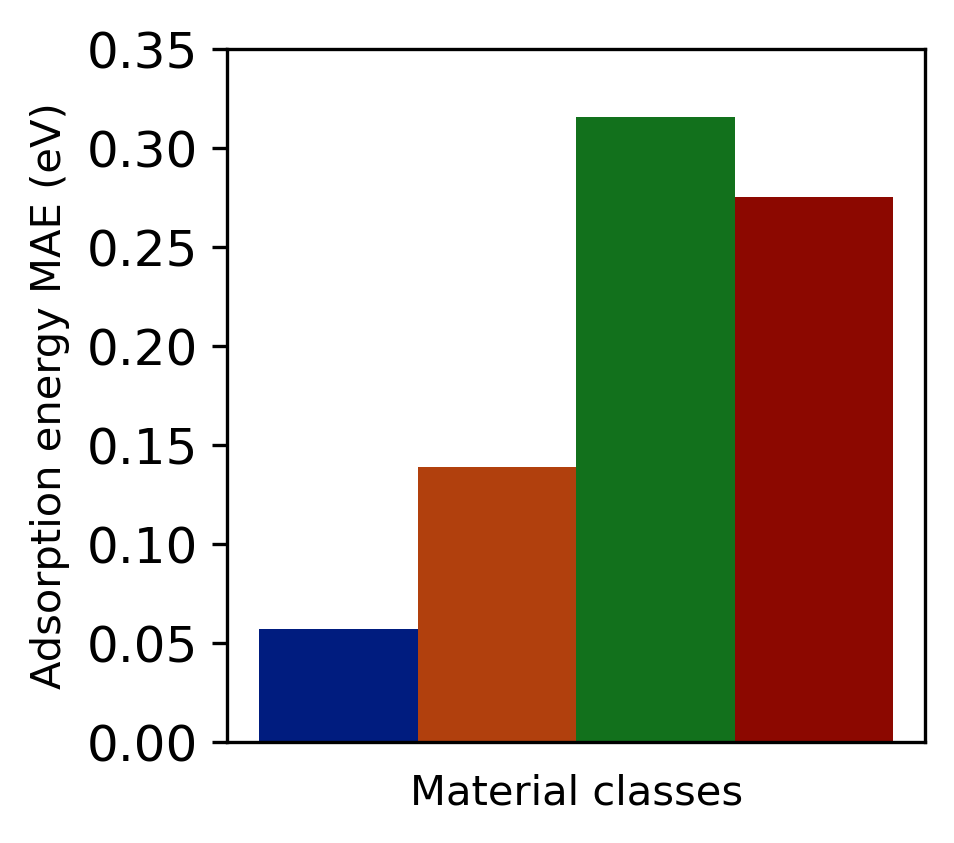

In [10]:
# Extract labels and mean values
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
labels = list(original_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 1  # the width of the bars

fig, ax = plt.subplots(dpi=300, figsize=(3,3))
colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals': '#12711c', 'Halides': '#8c0800'}
# Plotting the bars
ax.bar(x - width/2, list(original_dict.values()), width, align='edge', label='With surface reconstruction', color = colors.values())

# Add labels and title
ax.set_ylabel('Adsorption energy MAE (eV)',fontsize=10)
ax.set_ylim(0,0.35)
ax.set_xticks(labels)
ax.set_xticks(labels, materials)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Material classes", fontsize=10)
plt.xticks([]);

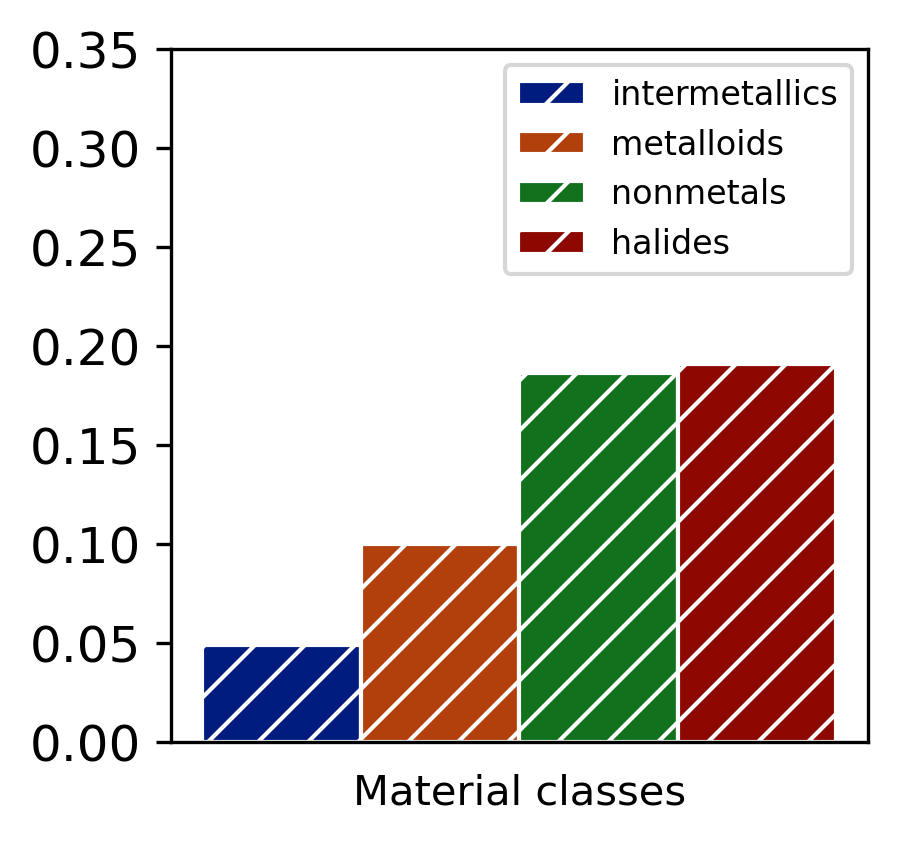

In [11]:
# Extract labels and mean values
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
labels = list(original_dict.keys())
x = np.arange(len(labels))  # the label locations
width = 1  # the width of the bars

fig, ax = plt.subplots(dpi=300, figsize=(3,3))
# Plotting the bars
ax.bar(x+ width/2, list(no_surface_anomaly_dict.values()), width, label=materials, 
       color = colors.values(),edgecolor='white',hatch='//' )

plt.legend(fontsize=8)
# Add labels and title
# ax.set_ylabel('Adsorption energy MAE (eV)',fontsize=10)
ax.set_ylim(0,0.35)
ax.set_xticks(labels)
ax.set_xticks(labels, materials)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Material classes", fontsize=10)
plt.xticks([]);